In [35]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (15,8))

In [36]:
frauds = pd.read_csv('data/dataset-frauds.csv', sep = ';')
cards = pd.read_csv('data/dataset-cards.csv', sep = ';')
customers = pd.read_csv('data/dataset-customers.csv', sep = ';')
transactions = pd.read_csv('data/dataset-transactions.csv', sep = ';')

In [37]:
transactions_selector = transactions['id'].isin(frauds['transaction_id'])

In [38]:
fraud_transaction = transactions[transactions_selector]

In [39]:
fraud_transaction

,id,card_number,transaction_date,value,segment
102,CTID50558449,4246-1369-3659-8804,2016-05-06,6984,SEG23
219,CTID55936882,1336-9200-1264-2551,2016-11-29,34367,SEG21
336,CTID63762180,8528-6154-7390-5081,2016-12-05,44550,SEG15
494,CTID76723439,7908-2695-7391-7499,2016-09-15,48275,SEG16
560,CTID21246201,2524-4184-5908-6750,2016-02-29,35751,SEG25
...,...,...,...,...,...
9841,CTID57993591,6697-9358-9213-4896,2016-04-02,31486,SEG24
9881,CTID91108283,9207-1270-6690-4905,2016-07-17,36706,SEG11
9933,CTID30494187,9018-5320-5729-5393,2016-12-31,14586,SEG20
9973,CTID51301522,3620-5235-2101-3391,2016-01-28,22354,SEG23


In [40]:
fradulent_cards_selector = cards['card_number'].isin(fraud_transaction['card_number'])

In [41]:
fradulent_cards = cards[fradulent_cards_selector]

In [42]:
fradulent_cards

,card_number,card_family,credit_limit,customer_id
14,7214-4915-6387-5429,Platinum,172000,CC72302
18,6239-8641-8524-9441,Gold,26000,CC18438
22,6228-9033-3508-8121,Gold,33000,CC36771
23,1466-1600-9312-7604,Premium,249000,CC60926
26,7586-6475-9618-3909,Gold,37000,CC51908
...,...,...,...,...
460,1947-8327-3848-6581,Platinum,113000,CC11690
461,9018-5320-5729-5393,Premium,444000,CC54582
463,2949-1972-1300-6680,Gold,45000,CC68567
472,5384-8278-5616-5502,Premium,361000,CC83124


In [43]:
cards_with_double_fraud_trasaction_selector = fraud_transaction['card_number'].duplicated(keep = False)

In [44]:
fraud_transaction[cards_with_double_fraud_trasaction_selector]

,id,card_number,transaction_date,value,segment
600,CTID20567160,3295-6390-4452-7199,2016-10-08,49155,SEG16
957,CTID81479835,3295-6390-4452-7199,2016-01-16,41525,SEG17
1664,CTID28195227,8231-5519-1948-3400,2016-03-10,16857,SEG17
2066,CTID78032595,7697-2274-6431-6408,2016-06-30,16222,SEG20
2163,CTID22306254,1290-5480-3763-3387,2016-03-01,33741,SEG18
2866,CTID45648244,1175-3754-1370-5515,2016-10-07,13019,SEG16
3221,CTID56692687,3620-5235-2101-3391,2016-12-15,2211,SEG22
4062,CTID36997643,3440-3330-5015-4988,2016-04-11,8243,SEG14
4142,CTID55429304,9030-1667-6058-6173,2016-03-03,48514,SEG15
4231,CTID12041601,8231-5519-1948-3400,2016-08-01,25274,SEG22


In [45]:
group_fradulent_cards = fradulent_cards.groupby('card_family')

In [46]:
group_fradulent_cards.describe()

credit_limit                                                    \
                   count           mean            std       min       25%   
card_family                                                                  
Gold                34.0   28000.000000   13434.464950    2000.0   19250.0   
Platinum            23.0  144173.913043   34706.106581   56000.0  121000.0   
Premium             41.0  468097.560976  232358.753319  121000.0  287000.0   

                                           
                  50%       75%       max  
card_family                                
Gold          31000.0   36750.0   50000.0  
Platinum     150000.0  163500.0  197000.0  
Premium      430000.0  677000.0  879000.0

array([[<AxesSubplot:title={'center':'value'}>]], dtype=object)

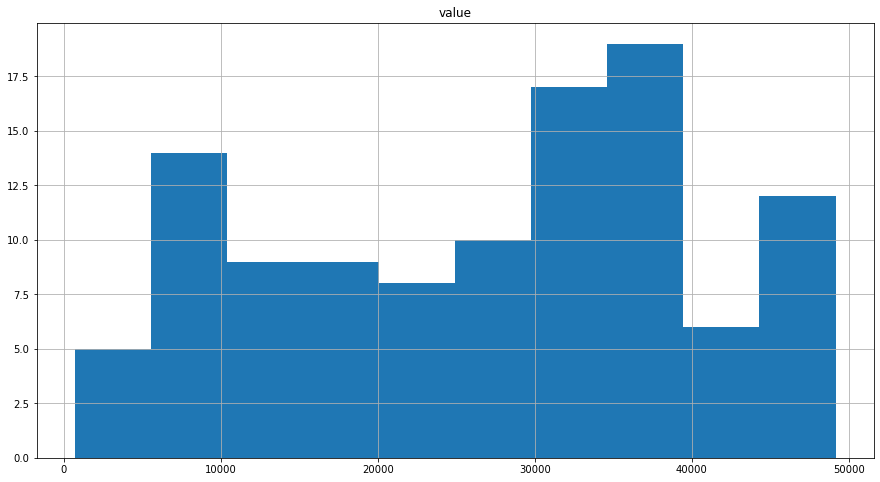

In [47]:
fraud_transaction.hist('value')

In [48]:
fraud_transaction_0_10K = (fraud_transaction['value'] > 0000) & (fraud_transaction['value'] < 10000)
fraud_transaction_10K_20K = (fraud_transaction['value'] > 10000) & (fraud_transaction['value'] < 20000)
fraud_transaction_20K_30K = (fraud_transaction['value'] > 20000) & (fraud_transaction['value'] < 30000)
fraud_transaction_30K_40K = (fraud_transaction['value'] > 30000) & (fraud_transaction['value'] < 40000)
fraud_transaction_40K_50K = (fraud_transaction['value'] > 40000) & (fraud_transaction['value'] < 50000)

In [49]:
fraud_transaction[fraud_transaction_0_10K].describe()

,value
count,19.000000
mean,6670.263158
std,2763.737362
min,683.000000
25%,5540.500000
50%,8038.000000
75%,8786.500000
max,9587.000000


In [50]:
fraud_transaction[fraud_transaction_10K_20K].describe()

,value
count,18.000000
mean,14835.333333
std,2595.019664
min,10423.000000
25%,13022.250000
50%,15334.000000
75%,16902.750000
max,18851.000000


In [51]:
fraud_transaction[fraud_transaction_20K_30K].describe()

,value
count,18.000000
mean,25110.944444
std,3283.759314
min,20660.000000
25%,21873.250000
50%,25328.500000
75%,27490.250000
max,29746.000000


In [52]:
fraud_transaction[fraud_transaction_30K_40K].describe()

,value
count,36.000000
mean,34779.194444
std,2417.949129
min,30262.000000
25%,33037.250000
50%,34670.000000
75%,36771.000000
max,38744.000000


In [53]:
fraud_transaction[fraud_transaction_40K_50K].describe()

,value
count,18.000000
mean,45797.166667
std,2923.390019
min,40751.000000
25%,43670.000000
50%,45783.500000
75%,48498.750000
max,49155.000000


Conclusão: Através dos dados fornecidos foi possível identificar uma associação entre as transações fraudulentas e os valores dessas transações, podendo assim concluir que no intervalo de transações nos valores entre 30.000 e 40.000 há ocorrêcia de aproximadamente duas vezes mais transações fraudulentas que nos demais intervalos como ilustra a tabela abaixo. 

In [59]:
pd.read_excel('data/Resultado_Anlise_Fraudes.xlsx')

,Intervalo,Quantidade de Dados
0,0 - 10.000,19
1,10.000 - 20.000,18
2,20.000 - 30.000,18
3,30.000 - 40.000,36
4,40.000 - 50.000,18
5,Total de Dados,109
